## Introduction

In this project, we explore a text analysis on the renowned novel *Moby Dick* by Herman Melville. The primary objective of the analysis was to examine the most frequent words in the text and draw insights into the underlying themes of the novel. The analysis was conducted through the following steps:

1. **Text Download and Scraping**: We used the `requests` library to fetch the full text of *Moby Dick* from Project Gutenberg (available [here](https://www.gutenberg.org/files/2701/2701-h/2701-h.htm)). To extract the main body of the text, we employed the BeautifulSoup library for web scraping.
   
2. **Text Cleaning**: The raw text was cleaned by removing unnecessary line spaces (`\n`) and extra spaces. This helped in ensuring that the text was uniform and ready for analysis. The cleaning functions used were designed to:
   - Remove line spaces and extra spaces
   - Convert the text to lowercase to standardize the analysis

3. **Text Preprocessing**: We leveraged the powerful `spaCy` library for lemmatization and stopword removal. This preprocessing step was essential for reducing the text to its meaningful components, such as nouns and verbs, while discarding common words that don't add value to the analysis.

4. **Frequency Analysis**: Using the NLTK library, we calculated the frequency distribution of words in the cleaned text. This allowed us to identify the 20 most common words, providing valuable insight into the key themes and subjects present in the novel.

---

### Import libraries:

In [78]:
import requests
from bs4 import BeautifulSoup
import nltk
import spacy


from nltk.probability import FreqDist

### Web Scraping:

In [38]:
# Get URL response
URL = r'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

response = requests.get(URL)

if response.status_code == 200:
  html_content = response.text
else:
  print(f'Failed to retreive the Webpage response')

In [39]:
# Web page scrapping for text
soup = BeautifulSoup(html_content, 'html5lib')
text = soup.get_text()
print(text[:1000])




The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville



    body {margin-left:15%; margin-right:15%; text-align:justify }
    p { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    pre        { font-family: times new roman; font-size: 100%; margin-left: 10%;}

    table      {margin-left: 10%;}

a:link {color:blue;
		text-decoration:none}
link {color:blue;
		text-decoration:none}
a:visited {color:blue;
		text-decoration:none}
a:hover {color:red}


  
  

The Project Gutenberg eBook of Moby-Dick; or The Whale, by Herman Melville

This eBook is for the use 

In [50]:
# Filtering the main text and removing unwanted text
starts = text.find("Call me Ishmael.")
ends = text.find("End of Project Gutenberg's Moby Dick")
cleaned_text = text[starts:ends]
cleaned_text[:1000]

'Call me Ishmael. Some years ago—never mind how long precisely—having\n      little or no money in my purse, and nothing particular to interest me on\n      shore, I thought I would sail about a little and see the watery part of\n      the world. It is a way I have of driving off the spleen and regulating the\n      circulation. Whenever I find myself growing grim about the mouth; whenever\n      it is a damp, drizzly November in my soul; whenever I find myself\n      involuntarily pausing before coffin warehouses, and bringing up the rear\n      of every funeral I meet; and especially whenever my hypos get such an\n      upper hand of me, that it requires a strong moral principle to prevent me\n      from deliberately stepping into the street, and methodically knocking\n      people’s hats off—then, I account it high time to get to sea as soon\n      as I can. This is my substitute for pistol and ball. With a philosophical\n      flourish Cato throws himself upon his sword; I quietly 

Results are quiet satisfying that main text is extracted. However, there are line spacing (\n) and extra space.

### Text Preprocessing:

In [65]:
# Remove line space(\n) and extra space
def remove_line_space(text):
  filtered_text = text.replace('\n', ' ').strip()
  return filtered_text

def remove_extra_space(text):
  return ' '.join(text.split())

def clean_text(text):
  if isinstance(text, str):
    text = remove_line_space(text)
    text = remove_extra_space(text)
    text = text.lower()
    return text

In [68]:
# Extracted main text
cleaned_text = clean_text(cleaned_text)
cleaned_text[:1000]

'call me ishmael. some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, i thought i would sail about a little and see the watery part of the world. it is a way i have of driving off the spleen and regulating the circulation. whenever i find myself growing grim about the mouth; whenever it is a damp, drizzly november in my soul; whenever i find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral i meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, i account it high time to get to sea as soon as i can. this is my substitute for pistol and ball. with a philosophical flourish cato throws himself upon his sword; i quietly take to the ship. there is nothing surprising in this. if they but knew it, almost a

In [77]:
nlp = spacy.load("en_core_web_sm")

nlp.max_length = len(cleaned_text) + 100

def preprocess_text_spacy(text):
    """
    Preprocess text using spaCy:
    - Tokenize the text
    - Remove stopwords
    - Keep only alphabetic words
    - Perform lemmatization
    """
    doc = nlp(text)
    filtered = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return filtered
cleaned_text = preprocess_text_spacy(cleaned_text)
cleaned_text[:10]

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


['ishmael',
 'year',
 'ago',
 'mind',
 'long',
 'precisely',
 'have',
 'little',
 'money',
 'purse']

### Analyze Word Frequency:

In [81]:
# Calculate the frequency of the same word occured
freq_dist = FreqDist(cleaned_text)
# Display the 20 most common frequent word in Moby Dick novel
freq_dist.most_common(20)

[('whale', 1447),
 ('man', 772),
 ('like', 642),
 ('ship', 607),
 ('sea', 516),
 ('ahab', 499),
 ('boat', 470),
 ('old', 453),
 ('head', 452),
 ('time', 444),
 ('ye', 424),
 ('come', 398),
 ('say', 369),
 ('look', 356),
 ('long', 354),
 ('captain', 345),
 ('hand', 341),
 ('great', 317),
 ('thing', 316),
 ('know', 305)]

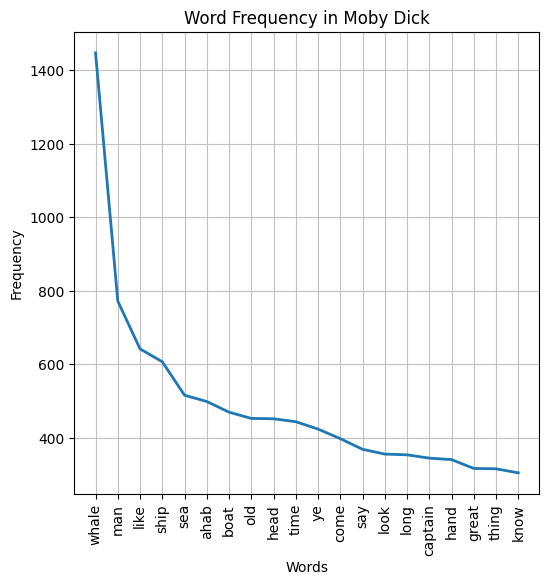

In [95]:
import matplotlib.pyplot as plt
# Plot Frequency Distribution
plt.figure(figsize = (6,6))
freq_dist.plot(20, title="Word Frequency in Moby Dick")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

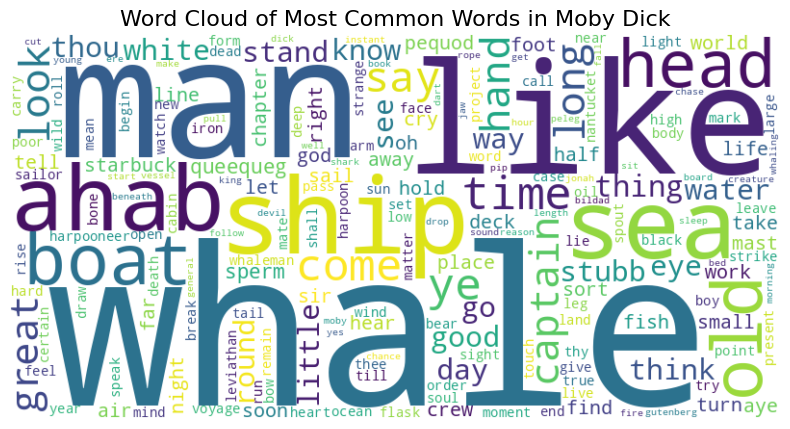

In [99]:
# Word cloud
from wordcloud import WordCloud
# Creating the Dictionary
freq_dict = {}
for words, values in freq_dist.items():
  freq_dict[words] = values

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Words in Moby Dick", fontsize=16)
plt.show()

### As per the most frequent words exhibit information that this novel revolves aroud the (whale, ship, sea, ahbab, old, man). Therefore, it says that novel is about the whale in the sea and showing the adventure story where ahbab character is protagonist whose journey starts in the sea and he sails using ship and boat.

## Conclusion

By analyzing the most frequent words in *Moby Dick*, we gain insights into the central themes of the novel. The prominence of words like "whale," "ship," "sea," and "Ahab" indicates that the story is driven by the narrative of Captain Ahab’s relentless pursuit of the whale across the vast ocean. The frequent occurrence of words such as "boat," "head," "old," and "time" further underscores the nautical adventure, reflecting the passage of time and Ahab's enduring obsession.

This word frequency analysis, along with the visual representation through a word cloud, offers a compelling understanding of the novel’s core ideas. Through this simple yet effective text analysis approach, we can uncover the dominant themes in *Moby Dick* and explore how different aspects of the novel are woven together to form a cohesive story.